<a href="https://colab.research.google.com/github/Muskan-droiddd/mnist-classification/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import gradio as gr




In [2]:
# STEP 1: Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# STEP 2: Split data (60,000 train / 10,000 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [3]:
# STEP 3a: Train SGD Classifier (hinge loss = SVM)
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_preds = sgd_clf.predict(X_test)

# STEP 3b: Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

In [4]:
# STEP 4: Evaluate both classifiers
print("SGD Classifier Report:")
print(classification_report(y_test, sgd_preds))

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_preds))



SGD Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       983
           1       0.95      0.98      0.96      1152
           2       0.96      0.72      0.82       967
           3       0.86      0.79      0.82      1034
           4       0.87      0.93      0.90       906
           5       0.66      0.92      0.77       937
           6       0.94      0.90      0.92       961
           7       0.94      0.89      0.92      1055
           8       0.75      0.80      0.77       969
           9       0.91      0.81      0.85      1036

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.9

In [5]:
# Choose best model (RF in this case)
best_model = rf_clf
best_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


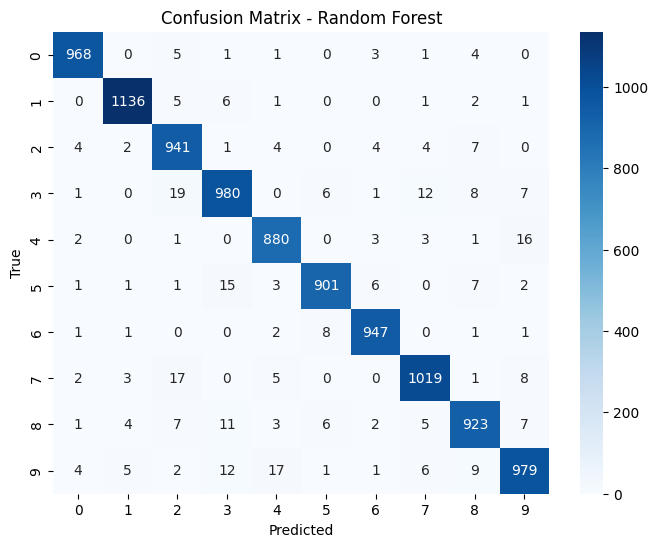

In [6]:
# STEP 5: Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

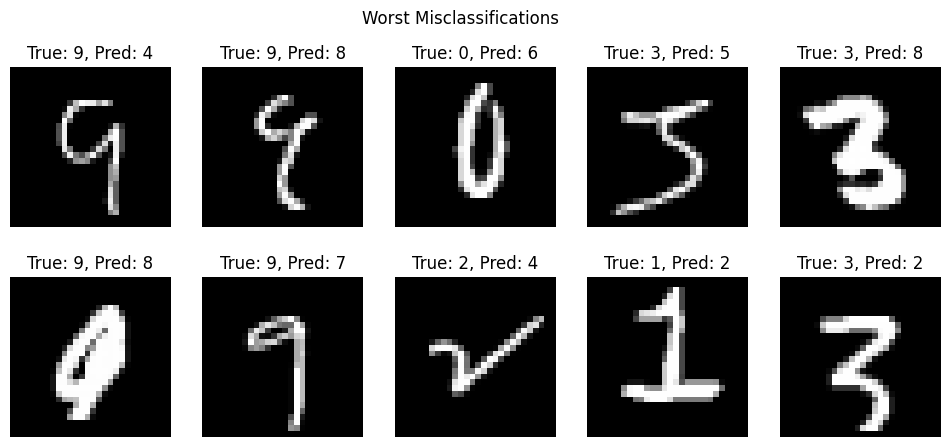

In [7]:
# STEP 6: Visualize worst misclassifications
def plot_misclassifications(X_test, y_test, y_pred, n=10):
    errors = (y_pred != y_test)
    X_errors = X_test[errors]
    y_errors = y_test[errors]
    y_pred_errors = y_pred[errors]

    # Find top n errors with lowest confidence (optional for probability models)
    plt.figure(figsize=(12, 5))
    for i in range(n):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(X_errors[i].reshape(28, 28), cmap="gray")
        plt.title(f"True: {y_errors[i]}, Pred: {y_pred_errors[i]}")
        plt.axis('off')
    plt.suptitle("Worst Misclassifications")
    plt.show()

plot_misclassifications(X_test, y_test, rf_preds, n=10)

In [21]:
def predict_digit(img_input):
    try:
        print(" Raw Input Type:", type(img_input))
        print(" Dict Keys:", img_input.keys() if isinstance(img_input, dict) else "Not a dict")

        # Step 1: extract image array
        if isinstance(img_input, dict):
            # extract one of the common keys
            if "image" in img_input:
                img_array = img_input["image"]
            elif "composite" in img_input:
                img_array = img_input["composite"]
            else:
                return f" Unsupported dict keys: {list(img_input.keys())}"
        elif isinstance(img_input, np.ndarray):
            img_array = img_input
        else:
            return " Unsupported input format."

        print(" Extracted Image Array Shape:", np.shape(img_array))

        # Step 2: Convert to PIL image
        img = Image.fromarray(np.uint8(img_array)).convert("L")
        img_resized = img.resize((28, 28))
        img_inverted = ImageOps.invert(img_resized)

        # Step 3: Flatten and predict
        img_flat = np.array(img_inverted).reshape(1, -1)
        prediction = best_model.predict(img_flat)[0]
        return f"Predicted Digit: {prediction}"

    except Exception as e:
        print(" Exception:", e)
        return f" Error: {e}"


In [22]:
gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(image_mode="L", width=280, height=280),
    outputs=gr.Text(label="Prediction"),
    title="MNIST Digit Classifier",
    description="Draw a digit and see the model’s prediction."
).launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://72138c529b60ac30d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
📦 Raw Input Type: <class 'dict'>
📄 Dict Keys: dict_keys(['background', 'layers', 'composite'])
✅ Extracted Image Array Shape: (800, 800)
Keyboard interruption in main thread... c

ERROR ANALYSISI REPORT

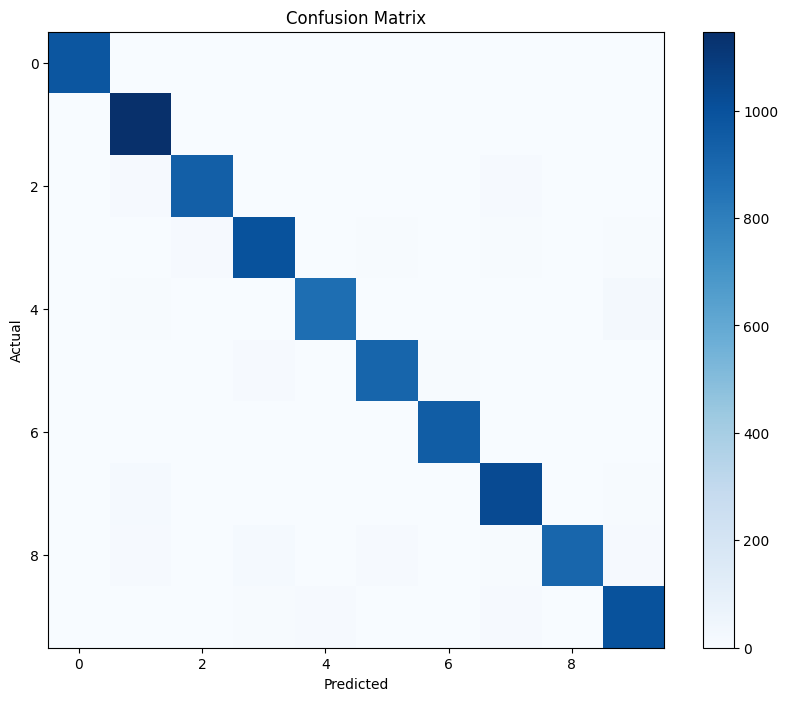

🔴 4 misclassified as 9 — 18 times
🔴 8 misclassified as 3 — 15 times
🔴 7 misclassified as 1 — 14 times


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict using best trained model (from earlier)
y_pred = best_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# top 3 common misclassifications (excluding correct diagonals)
def top_errors(cm):
    errors = []
    for actual in range(10):
        for predicted in range(10):
            if actual != predicted:
                errors.append(((actual, predicted), cm[actual, predicted]))
    return sorted(errors, key=lambda x: -x[1])[:3]

top_3 = top_errors(cm)
for (actual, pred), count in top_3:
    print(f" {actual} misclassified as {pred} — {count} times")


solution

In [26]:
from scipy.ndimage import rotate

def rotate_image(image, angle):
    return rotate(image.reshape(28, 28), angle, reshape=False).reshape(784)

X_rot_aug = []
y_rot_aug = []

for x, label in zip(X_train, y_train):
    X_rot_aug.append(x)
    y_rot_aug.append(label)

    # Rotate -10 degrees
    X_rot_aug.append(rotate_image(x, -10))
    y_rot_aug.append(label)

    # Rotate +10 degrees
    X_rot_aug.append(rotate_image(x, 10))
    y_rot_aug.append(label)

X_rot_aug = np.array(X_rot_aug)
y_rot_aug = np.array(y_rot_aug)


In [27]:
knn_rot = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_rot.fit(X_rot_aug, y_rot_aug)
y_pred_rot = knn_rot.predict(X_test)

# Compare performance
print("Original Accuracy:", accuracy_score(y_test, y_pred))
print("After Rotation Accuracy:", accuracy_score(y_test, y_pred_rot))

# Check improvement on specific errors
cm_rot = confusion_matrix(y_test, y_pred_rot)
print("🔁 4→9:", cm_rot[4][9])
print("🔁 8→3:", cm_rot[8][3])
print("🔁 7→1:", cm_rot[7][1])


Original Accuracy: 0.9729
After Rotation Accuracy: 0.9784
🔁 4→9: 18
🔁 8→3: 9
🔁 7→1: 8
